# Customer Segmentation of Union Bank of Bolivia data

# By Shri Krishna

In this project we will extract data 'Union bank of Bolivia' customer data from Kaggle, then we will clean and transform values so that it becomes suitable to perform various visualization and segmentation operations. The task is performed using mix of R Studio and Jupyter Notebook.


# Importing libraries

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading data
df=pd.read_csv("Bank_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Person_ID         1949 non-null   int64  
 1   Own_House         1949 non-null   int64  
 2   Own_vehicle       1949 non-null   int64  
 3   Standard_Savings  1949 non-null   int64  
 4   Bank_Debts        1949 non-null   int64  
 5   Gender            1949 non-null   object 
 6   Age               1949 non-null   int64  
 7   Name              1949 non-null   object 
 8   Area              1949 non-null   object 
 9   CreditScore       1949 non-null   int64  
 10  Annual_Salary     1949 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 167.6+ KB


In [4]:
print(df.dtypes)

Person_ID             int64
Own_House             int64
Own_vehicle           int64
Standard_Savings      int64
Bank_Debts            int64
Gender               object
Age                   int64
Name                 object
Area                 object
CreditScore           int64
Annual_Salary       float64
dtype: object


In [5]:
df.columns

Index(['Person_ID', 'Own_House', 'Own_vehicle', 'Standard_Savings',
       'Bank_Debts', 'Gender', 'Age', 'Name', 'Area', 'CreditScore',
       'Annual_Salary'],
      dtype='object')

In [6]:
sns.set()
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [7]:
df.shape

(1949, 11)

In [8]:
df.head

<bound method NDFrame.head of       Person_ID  Own_House  Own_vehicle  Standard_Savings  Bank_Debts Gender  \
0             1          0            1              3989           1      F   
1             2          0            0              7076           1      M   
2             3          1            1              5659           1      F   
3             4          0            0              6314           0      F   
4             5          0            0              9894           0      F   
...         ...        ...          ...               ...         ...    ...   
1944       1945          1            1              2166           1      M   
1945       1946          0            0              1586           0      F   
1946       1947          1            1              8345           0      M   
1947       1948          0            1              4461           0      M   
1948       1949          0            0              7387           1      M   

      Age

# check for missing values

<AxesSubplot:>

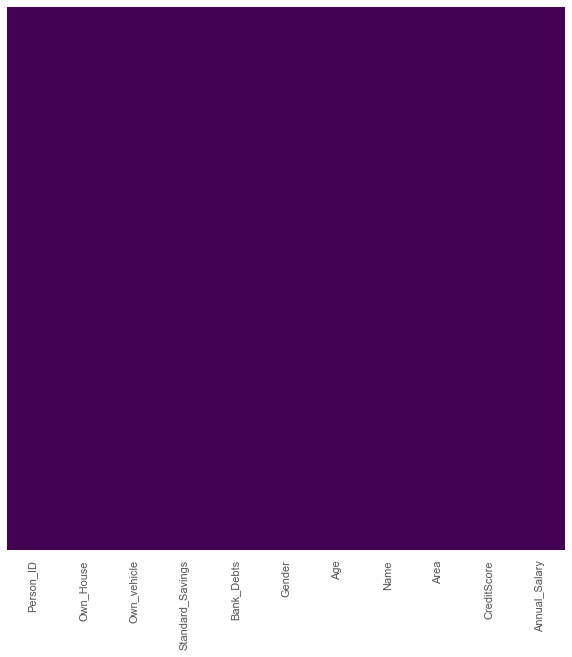

In [9]:

plt.figure(figsize=(10,10))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
Gender1 = pd.get_dummies(df['Gender'], drop_first=True)
Gender1.head()

,M
0,0
1,1
2,0
3,0
4,0


# Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

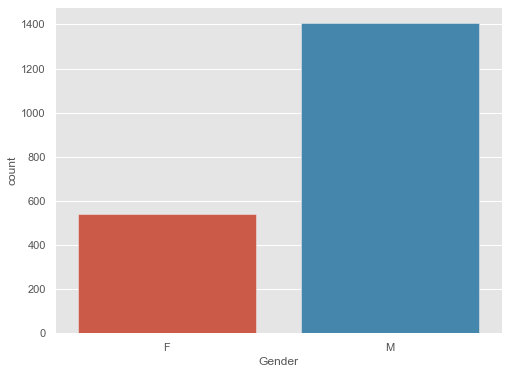

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

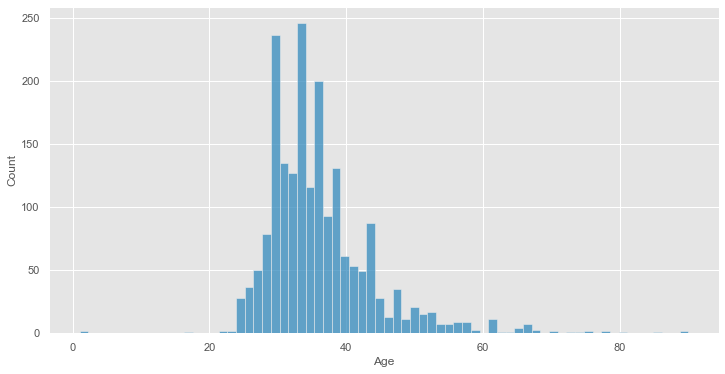

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age', data=df)

<AxesSubplot:xlabel='Standard_Savings', ylabel='Count'>

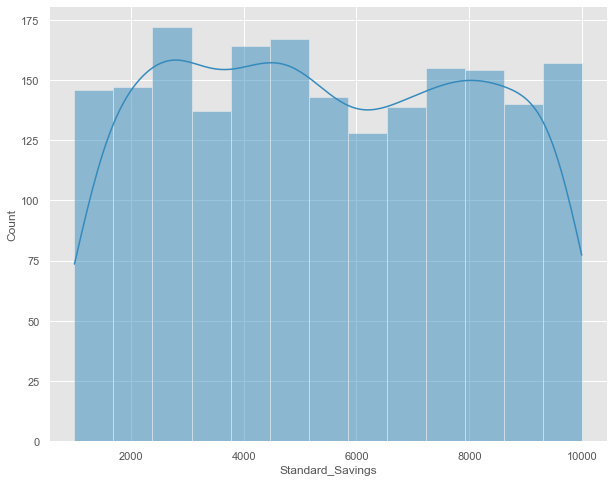

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(x='Standard_Savings', data=df,kde=True)

<AxesSubplot:xlabel='Annual_Salary', ylabel='Count'>

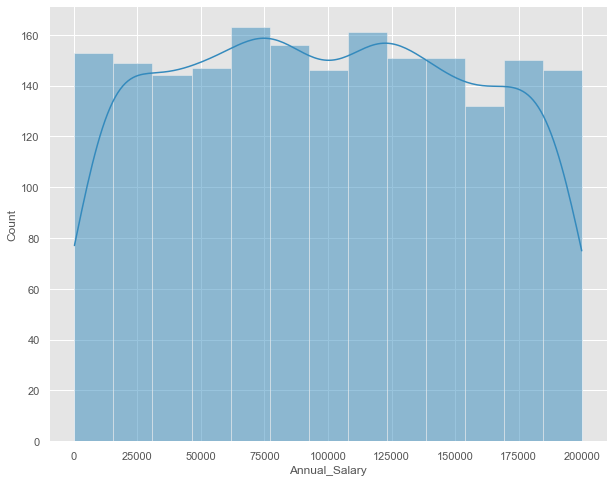

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(x='Annual_Salary', data=df,kde=True)

# Feature Selection

In [15]:
#Feature Selection 
newdata=df.iloc[:,3:11]
newdata

,Standard_Savings,Bank_Debts,Gender,Age,Name,Area,CreditScore,Annual_Salary
0,3989,1,F,28,Con,Shenavan,619,101348.88
1,7076,1,M,65,Alphonso,Shubenka,608,112542.58
2,5659,1,F,25,Bordy,Chowṉêy,502,113931.57
3,6314,0,F,48,Margot,Pakxong,699,93826.63
4,9894,0,F,34,Denice,Ardazubre,850,79084.10
...,...,...,...,...,...,...,...,...
1944,2166,1,M,32,Donny,5 de Mayo,783,143752.77
1945,1586,0,F,27,Sallyann,Poja,734,121894.31
1946,8345,0,M,32,Teddie,Jingmen,648,147055.87
1947,4461,0,M,45,Philippine,San Vicente,688,172033.57


In [16]:
newdata=newdata.drop(['Gender'],axis=1)
newdata=newdata.drop(['Name'],axis=1)
newdata=newdata.drop(['Area'],axis=1)
newdata

,Standard_Savings,Bank_Debts,Age,CreditScore,Annual_Salary
0,3989,1,28,619,101348.88
1,7076,1,65,608,112542.58
2,5659,1,25,502,113931.57
3,6314,0,48,699,93826.63
4,9894,0,34,850,79084.10
...,...,...,...,...,...
1944,2166,1,32,783,143752.77
1945,1586,0,27,734,121894.31
1946,8345,0,32,648,147055.87
1947,4461,0,45,688,172033.57


# Importing model

In [17]:
#Importing Models
from sklearn.cluster import KMeans
wcss=[]

In [18]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(newdata)
    wcss.append(kmeans.inertia_)

C:\Users\skris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


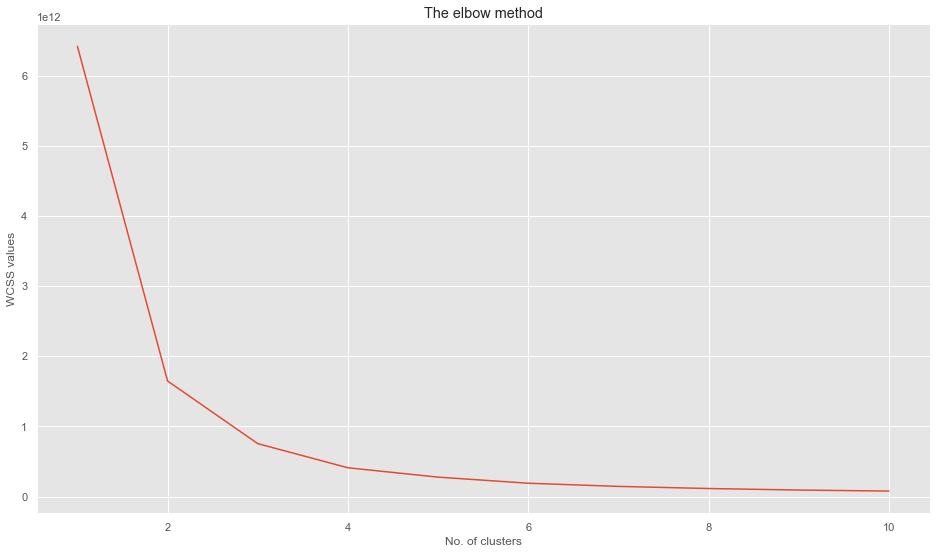

In [19]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS values")
plt.show()

# After using elbow method to find number of optimal clusters we find the value of k to be 4.

In [20]:
kmeans=KMeans(n_clusters=4)

In [21]:
kmeans.fit(newdata)

KMeans(n_clusters=4)

In [22]:
kmeans.cluster_centers_

array([[5.47667071e+03, 4.54545455e-01, 3.59919192e+01, 6.47452525e+02,
        1.26899741e+05],
       [5.55848594e+03, 5.28112450e-01, 3.58674699e+01, 6.52516064e+02,
        2.55281523e+04],
       [5.36949103e+03, 4.79820628e-01, 3.62982063e+01, 6.55753363e+02,
        1.76540756e+05],
       [5.45938431e+03, 5.49019608e-01, 3.63078431e+01, 6.45235294e+02,
        7.66905480e+04]])

In [23]:
print(kmeans.labels_) 
print(len(kmeans.labels_))

[3 0 0 ... 0 2 0]
1949


In [24]:

print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 495, 1: 499, 2: 446, 3: 509}


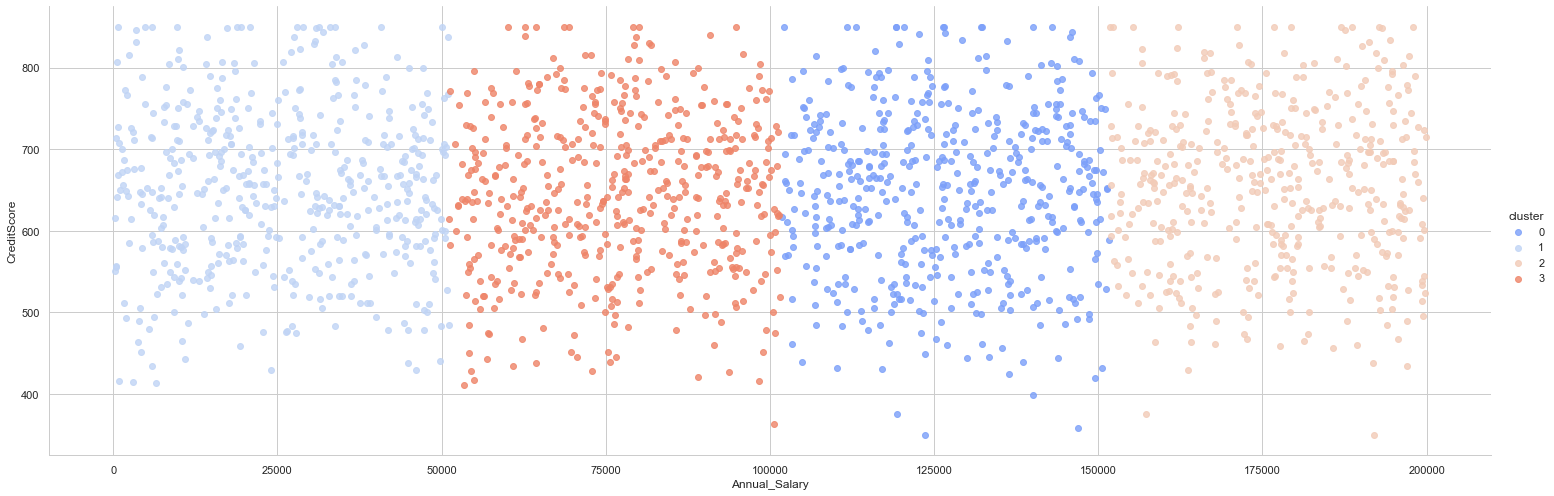

In [25]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data between Annual salary and standard Savings
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Annual_Salary','CreditScore',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=3,fit_reg=False)

# Clusters with respect to monthly salary and standard savings

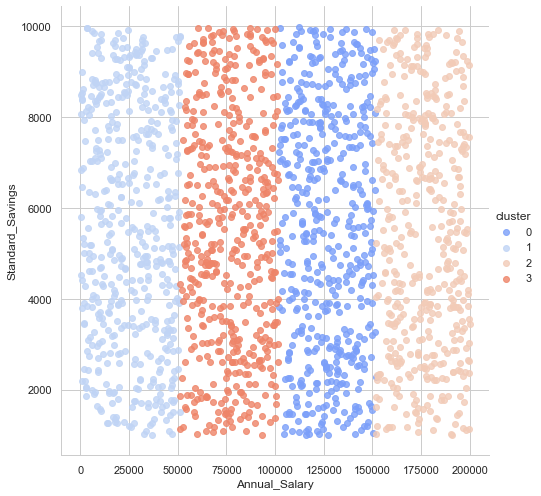

In [26]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data between Monthly Salary and Bank debts 
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Annual_Salary','Standard_Savings',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=1,fit_reg=False)

# Clusters with respect to monthly salary and bank debts

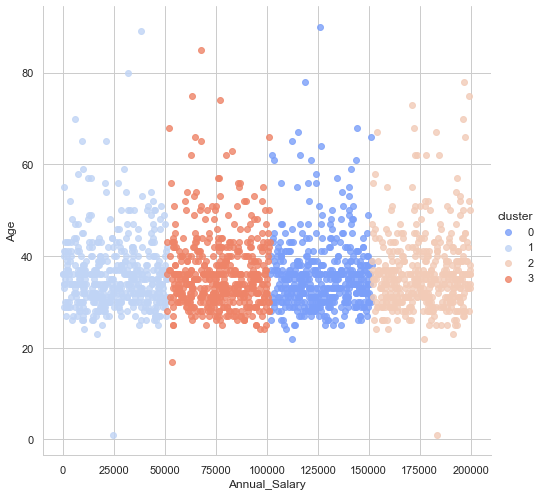

In [27]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data between Age and Monthly Salary
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Annual_Salary','Age',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=1,fit_reg=False)

# Clusters with respect to Age and Monthly salary 

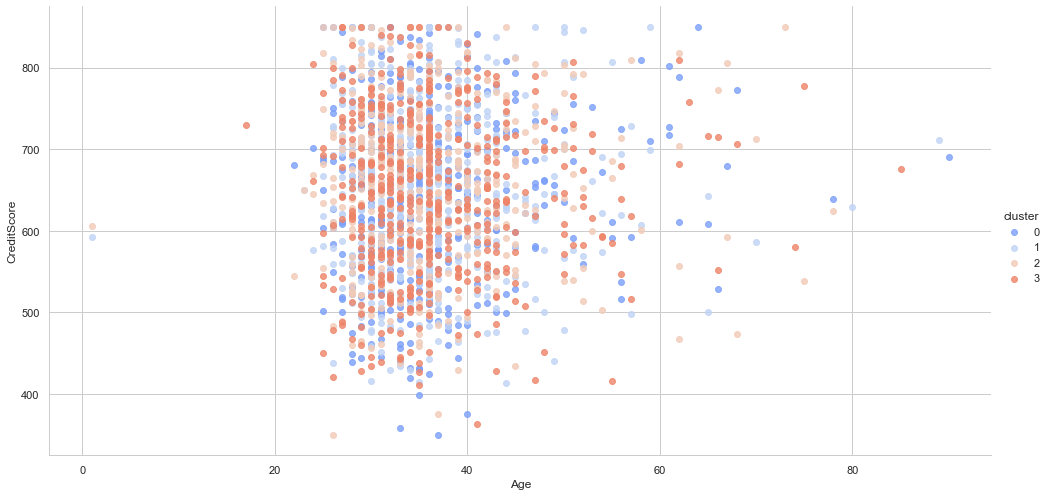

In [28]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data Age and standard savings
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','CreditScore',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=2,fit_reg=False)

# Clusters with respect to Age and standard savings